# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf 

# Importing Deep Learning Libraries

from  tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2023-06-08 19:11:13.245451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 19:11:24.976531: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2023-06-08 19:11:24.976670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2023-06-08 19:11:24.976681: W tensorflow/c

In [2]:
import os
import random
import shutil

emotion = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']

for i in emotion:

    # Set the source folder path containing the images
    src_folder = "E:\\Author's Kids\\CNN\\Dataset\\All\\" + i

    # Set the destination folder paths for the three splits
    split1_folder = "E:\\Author's Kids\\CNN\\Dataset\\train\\" + i
    split2_folder = "E:\\Author's Kids\\CNN\\Dataset\\validation\\" + i
    split3_folder = "E:\\Author's Kids\\CNN\\Dataset\\test"

    # Set the percentage splits for the data
    split1_percent = 0.8
    split2_percent = 0.1
    split3_percent = 0.1

    # Get a list of all the image files in the source folder
    img_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]

    # Shuffle the image files randomly
    random.shuffle(img_files)

    # Calculate the number of images for each split
    total_imgs = len(img_files)
    split1_count = int(total_imgs * split1_percent)
    split2_count = int(total_imgs * split2_percent)
    split3_count = total_imgs - split1_count - split2_count

    # Copy the images to each split folder
    for i, img_file in enumerate(img_files):
        if i < split1_count:
            shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split1_folder, img_file))
        elif i < split1_count + split2_count:
            shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split2_folder, img_file))
        else:
            shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split3_folder, img_file))

In [ ]:
def rename_images_in_folder(folder_path):
    folder_name = os.path.basename(folder_path)
    images = os.listdir(folder_path)
    for i, image in enumerate(images):
        old_path = os.path.join(folder_path, image)
        new_name = "{}_{}.jpg".format(folder_name, i+1)
        new_path = os.path.join(folder_path, new_name)
        os.rename(old_path, new_path)

In [ ]:
emotions = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
for i in emotions:
    rename_images_in_folder("Author's_Kids_Dataset/Inception/test/" + i)

# Displaying Images

In [2]:
picture_size = 100
folder_path = "Dataset/"

# Making Training and Validation Data

In [3]:
batch_size  = 16

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 2458 images belonging to 7 classes.
Found 305 images belonging to 7 classes.


# Model Building

In [4]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Create the InceptionResNetV2 model
input_shape = (100, 100, 3)
base_model = InceptionResNetV2(include_top=False, weights= None, input_shape=input_shape)

# Flatten the output of the InceptionResNetV2 model
flatten = Flatten()(base_model.output)

# Add a dense layer with 7 units and a softmax activation function
dense = Dense(7, activation='softmax')(flatten)

# Create the final model
model = Model(inputs=base_model.input, outputs=dense)

# Compile the model with the specified parameters
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

2023-06-08 19:11:31.959599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:11:32.772605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:11:32.772678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:11:32.791036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

# Fitting the Model with Training and Validation Data 

In [5]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 3

model.compile(loss='categorical_crossentropy',
              #optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                #callbacks=callbacks_list
                                )

/tmp/ipykernel_310/2350914230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/10


2023-06-08 18:30:47.517018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-06-08 18:30:57.225250: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-08 18:31:06.084605: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-08 18:31:06.213351: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-08 18:31:06.929804: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1c971100 initialized for platform CUDA (thi

153/153 [==============================] - 150s 412ms/step - loss: 1.4881 - accuracy: 0.5414 - val_loss: 3.3670 - val_accuracy: 0.4737
Epoch 2/10
153/153 [==============================] - 39s 252ms/step - loss: 0.6304 - accuracy: 0.8202 - val_loss: 1.4493 - val_accuracy: 0.6546
Epoch 3/10
153/153 [==============================] - 36s 232ms/step - loss: 0.3188 - accuracy: 0.9185 - val_loss: 0.1808 - val_accuracy: 0.9276
Epoch 4/10
153/153 [==============================] - 35s 229ms/step - loss: 0.2490 - accuracy: 0.9345 - val_loss: 0.1345 - val_accuracy: 0.9836
Epoch 5/10
153/153 [==============================] - 36s 231ms/step - loss: 0.2300 - accuracy: 0.9455 - val_loss: 0.5707 - val_accuracy: 0.8355
Epoch 6/10
153/153 [==============================] - 36s 234ms/step - loss: 0.1032 - accuracy: 0.9734 - val_loss: 0.0705 - val_accuracy: 0.9868
Epoch 7/10
153/153 [==============================] - 38s 249ms/step - loss: 0.1260 - accuracy: 0.9726 - val_loss: 0.2399 - val_accuracy: 0.

# Plotting Accuracy & Loss

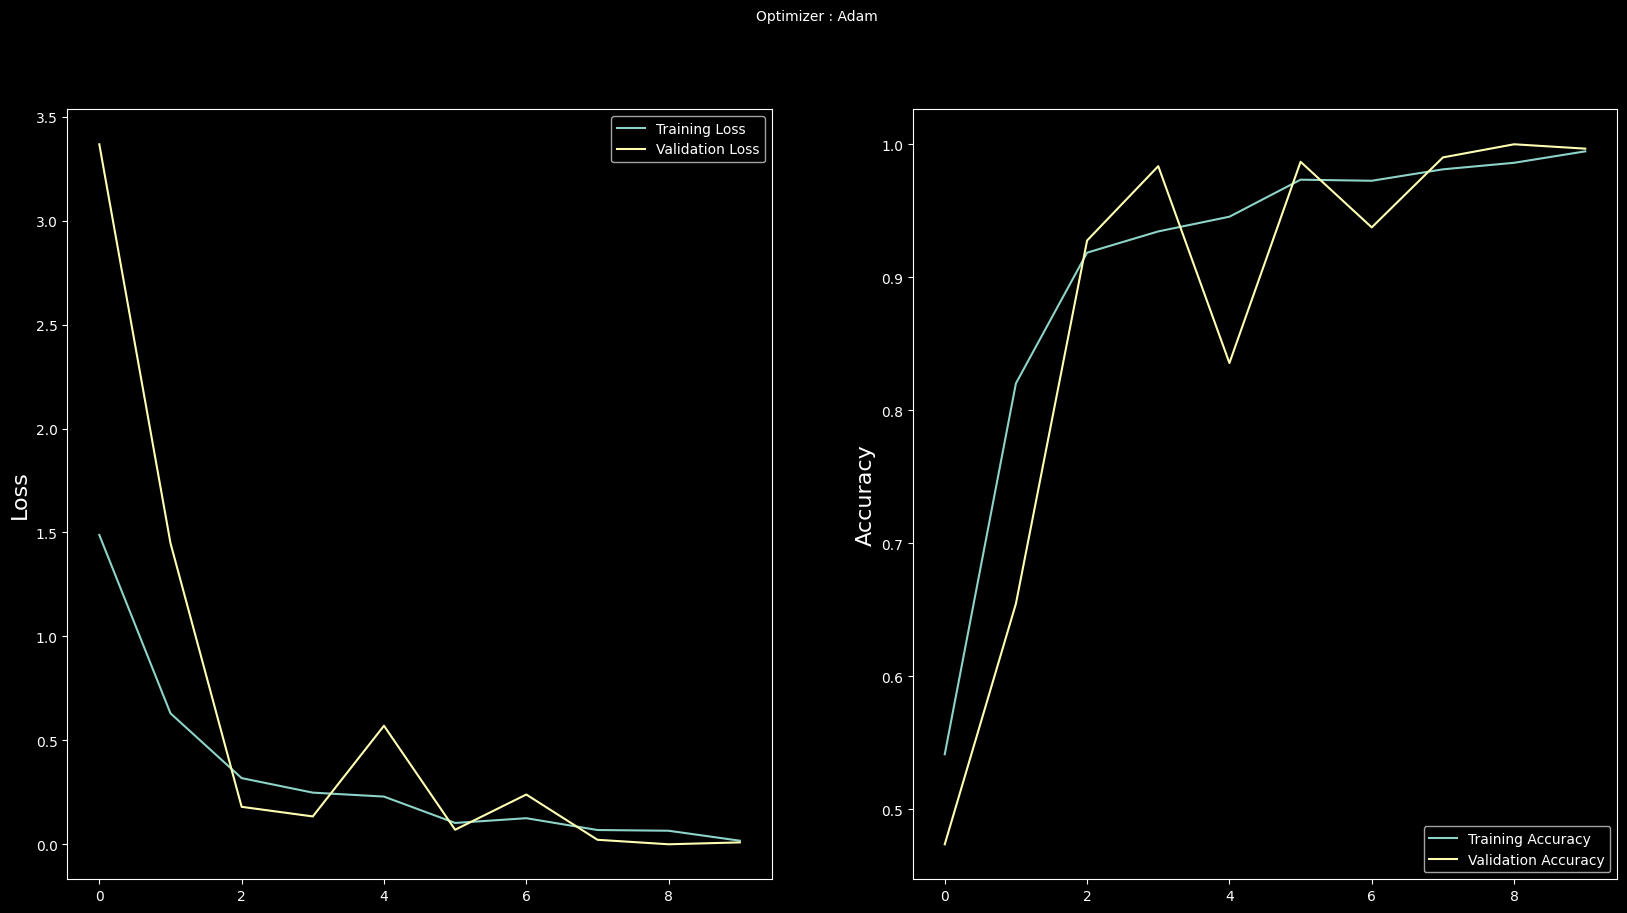

In [8]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
model.save("Author's_Kids_I.h5")

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def make_predictions(folder_path, model):
    emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    predictions = []
    num_correct = 0
    total_num = 0
   
    for file_name in os.listdir(folder_path):
        if not file_name.endswith('.jpg'):
            continue
       
        # Split the filename into the emotion label and the index
        label, index = file_name.split('_')
        index = int(index.split('.')[0])
       
        img_path = os.path.join(folder_path, file_name)
        img = load_img(img_path)
        img = tf.image.resize(img, (100, 100))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
       
        prediction = model.predict(img)
        predicted_label = emotion_labels[prediction.argmax()]
        predictions.append((file_name, predicted_label))
       
        if predicted_label == label:
            num_correct += 1
       
        total_num += 1
   
    accuracy = num_correct / total_num
    return predictions, accuracy

In [9]:
folder_path = "Dataset/test"
model = model
predictions, accuracy = make_predictions(folder_path, model)
print("Accuracy: {:.2%}".format(accuracy))

1/1 [==============================] - 0s 46ms/step
Accuracy: 95.22%
